In [1]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
    using StaticArrays, DifferentialEquations, DynamicalSystems, IntervalRootFinding, CairoMakie, JLD2
    include("C:\\Users\\Alex\\Desktop\\dynamical-systems\\system.jl");
    include("C:\\Users\\Alex\\Desktop\\dynamical-systems\\visual.jl");
else
    username = "nova"
    pathtorepo = "/home/nova/work/repo_ds/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
    using StaticArrays, DifferentialEquations, DynamicalSystems, IntervalRootFinding, CairoMakie, JLD2
    include("/home/nova/work/repo_ds/dynamical-systems/system.jl")
    include("/home/nova/work/repo_ds/dynamical-systems/visual.jl")
end

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`

plot_3d_2c_fp (generic function with 1 method)

In [2]:
time = 3000.0; tt = 0.0; tstep = 0.001;
tol = 1e-12
integ_set = (alg = Vern9(), adaptive = true, abstol = tol, reltol = tol);

In [3]:
u0 = [0.9445509341100914, 0.74116702856987, 0.7361196042973006, 0.0646914552140727, 0.15145764079879162, 0.0009327645775731449]
param = TM6_glial_ECM_get_params();
dict, indexparams = TM6_glial_ECM_help(param);
println(indexparams);


    τ - 1, τD - 2, τF - 3, τy - 4, α - 5, αE - 6, αecm - 7, αp - 8,
    J - 9, U0 - 10, I0 - 11, ΔU0 - 12, β - 13, βecm  -14, βp - 15,
    γp - 16, ecm0 - 17, ecm1 - 18, kecm - 19, θecm - 20, p0 - 21, p1 - 22, θp - 23, kp - 24, ythr - 25, xthr - 26


In [4]:
param[11] =  -1.741;
param[6] = 0.067;

In [5]:
ds= CoupledODEs(TM6_glial_ECM, u0, param, diffeq = integ_set);
tr, trange = trajectory(ds, time, Δt = tstep);

In [7]:
xlabsize = 55; ylabsize = 55; zlabsize = 55
textsize = 55;
ticksize = 40;
lw = 1.5;
spinewidth = 3.0;
color1 = :red;
color2 = :blue;
gridvisible = false;

In [6]:
Er = interval(0.0, 30.0);
xr, ur, yr = interval(-1.0, 1.0), interval(-1.0, 1.0), interval(-1.0, 1.0);
ecmr, pr = interval(-1.0, 1.0), interval(-1.0, 1.0);
box = IntervalBox(Er, xr, ur, yr, ecmr, pr);

fp, eigs, stable = fixedpoints(ds, box, TM6_glial_ECM_jac, tol = 1e-15, method = IntervalRootFinding.Krawczyk);
println("Number of fp:", length(fp));

Number of fp:3


In [32]:
cd("Images")

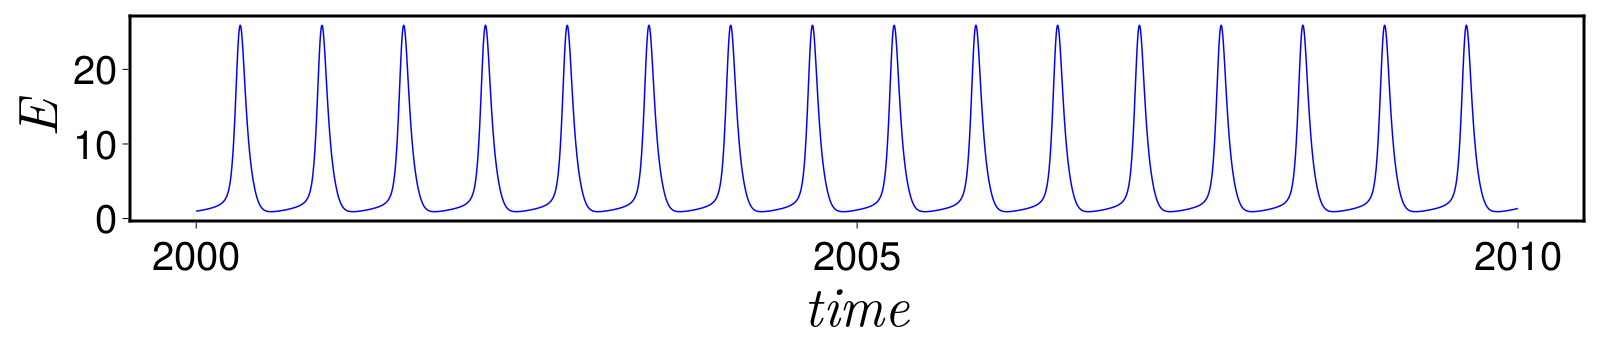

CairoMakie.Screen{EPS}


In [33]:
plt_start = 2000000; plt_end = 2010000;

width_ = 1600; height_ = 350;
xlab = L"time"; ylab = L"E";

f = Figure(resolution = (width_, height_))
ax = Axis(f[1, 1],
xlabel = xlab, ylabel = ylab, xlabelsize = xlabsize, ylabelsize = ylabsize,
xticklabelsize = ticksize, yticklabelsize = ticksize,
xgridvisible = gridvisible, ygridvisible = gridvisible,
spinewidth = spinewidth);

lines!(trange[plt_start:plt_end], tr[plt_start:plt_end, 1], linewidth = lw, color = color2);

display(f)

save("timeseries_limit_cycle.eps", f)

In [38]:
fp

6-dimensional StateSpaceSet{Float64} with 3 points
 2.98076   0.780101  0.630456  0.0656946    3.24033e-65  -5.84793e-123
 8.87461   0.48152   0.808868  0.000182715  3.75859e-48   1.78122e-149
 0.944945  0.924509  0.576087  0.488924     4.13337e-71   1.804e-106

In [41]:
eigs[2]

6-element Vector{ComplexF64}:
 -3.2388628134652264 + 0.0im
 -0.5555555555559162 + 0.0im
               -0.01 + 0.0im
              -0.001 + 0.0im
  0.2695359525187686 - 19.847032368902667im
  0.2695359525187686 + 19.847032368902667im

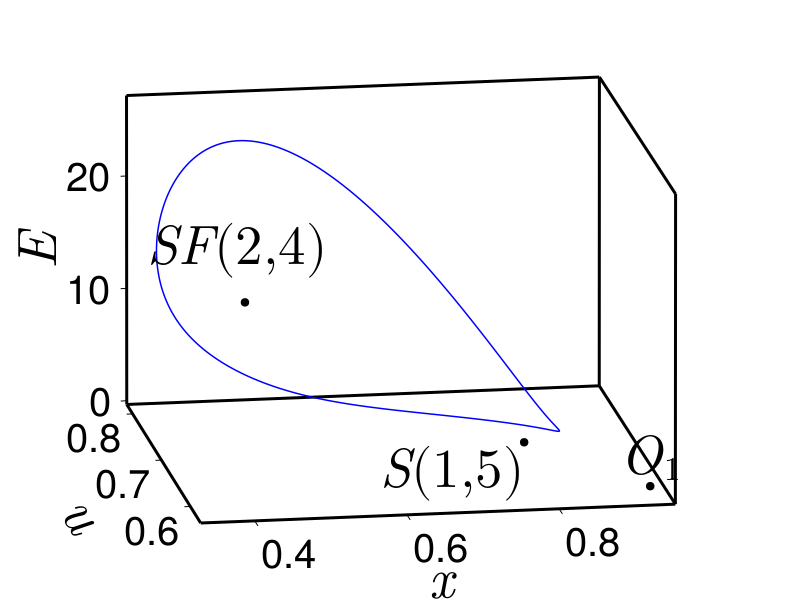

CairoMakie.Screen{EPS}


In [43]:
plt_start = 2000000; plt_end = 2010000;

index_x, index_y, index_z = 2, 3, 1;

width_ = 800; height_ = 600;
xlab = L"x"; ylab = L"u"; zlab = L"E";

azim = -0.55pi; elev = 0.08pi;

prot = 60;
disx = 40; disy = 70; disz = 60
mksize = 10;

colordot = :black

spinewidth = 3.0;

f = Figure(resolution = (width_, height_));
ax = Axis3(f[1, 1], azimuth = azim, elevation = elev,
                xlabel = xlab, ylabel = ylab, zlabel = zlab,
                xlabelsize = xlabsize, ylabelsize = ylabsize, zlabelsize = zlabsize,
                xticklabelsize = ticksize, yticklabelsize = ticksize, zticklabelsize = ticksize,
                xgridvisible = gridvisible, ygridvisible = gridvisible, zgridvisible = gridvisible,
                protrusions = prot, xlabeloffset = disx, ylabeloffset = disy, zlabeloffset = disz,
                xspinewidth = spinewidth, yspinewidth = spinewidth, zspinewidth = spinewidth, yticks = [0.6, 0.7, 0.8])

lines!(ax, tr[plt_start:plt_end, index_x], tr[plt_start:plt_end, index_y], tr[plt_start:plt_end, index_z], color = color2)

scatter!(ax, fp[1, index_x], fp[1, index_y], fp[1, index_z], markerksize = mksize, color = colordot);
text!(ax, fp[1, index_x], fp[1, index_y], fp[1, index_z], text = L"S(1,5)", fontsize = textsize, align = (:right, :top))

scatter!(ax, fp[2, index_x], fp[2, index_y], fp[2, index_z], markerksize = mksize, color = colordot);
text!(ax, fp[2, index_x], fp[2, index_y], fp[2, index_z], text = L"SF(2,4)", fontsize = textsize, align = (:right, :bottom), offset = (82,25))


scatter!(ax, fp[3, index_x], fp[3, index_y], fp[3, index_z], markerksize = mksize, color = colordot);
text!(ax, fp[3, index_x], fp[3, index_y], fp[3, index_z], text = L"O_1", fontsize = textsize, align = (:center, :bottom))

display(f)

save("phase_port_limit_cycle.eps", f)